In [147]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

ModuleNotFoundError: No module named 'Plotly'

In [109]:
anime_df=pd.read_csv("anime-dataset-2023.csv")
pd.set_option('display.max_columns', None)

In [110]:
anime_df

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,"TV Tokyo, Dentsu",Illumitoon Entertainment,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,无脑魔女,UNKNOWN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,UNKNOWN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",UNKNOWN,Not yet aired,UNKNOWN,UNKNOWN,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,55733,Di Yi Xulie,The First Order,第一序列,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",UNKNOWN,Finished Airing,UNKNOWN,UNKNOWN,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1931/...


as could be seen Anime dataset has some columns that don't give any useful information for analysys or double information from other columns(English name,other name,Synopsis,Image URL)

In [111]:
anime_df=anime_df.drop(columns=['Image URL'], axis=0)
anime_df=anime_df.drop(columns=['Licensors'], axis=0)
anime_df=anime_df.drop(columns=['Producers'], axis=0)
anime_df=anime_df.drop(columns=['English name'], axis=0)
anime_df=anime_df.drop(columns=['Other name'], axis=0)
anime_df=anime_df.drop(columns=['Synopsis'], axis=0)

In [112]:
print(anime_df['Score'].describe())

count       24905
unique        567
top       UNKNOWN
freq         9213
Name: Score, dtype: object


Let's filter data so we can get more information about Score

In [113]:
anime_df['Score'] = anime_df['Score'].replace('UNKNOWN', np.nan)
anime_df['Score'] = pd.to_numeric(anime_df['Score'], errors='coerce')
anime_df['Score'].isna().sum()

np.int64(9213)

In [114]:
anime_df=anime_df.dropna(subset='Score')

In [115]:
print(anime_df['Score'].describe())

count    15692.000000
mean         6.380890
std          0.928696
min          1.850000
25%          5.730000
50%          6.390000
75%          7.060000
max          9.100000
Name: Score, dtype: float64


We get data description, I had to delete 9k rows, but I want to work with clear data, so such manipulation is appropriate


Let's check rating column and reform data in numeric format.

In [116]:
anime_df['Rating'].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai',
       'UNKNOWN'], dtype=object)

In [117]:

rating_mapping = {
    'Rx - Hentai': 21,
    'R+ - Mild Nudity': 18,
    'R - 17+ (violence & profanity)': 17,
    'PG-13 - Teens 13 or older': 13,
    'PG - Children': 10,
    'G - All Ages': 0
}

In [118]:
anime_df['Rating']=anime_df['Rating'].replace(rating_mapping)
anime_df['Rating'] = anime_df['Rating'].replace('UNKNOWN', np.nan)
anime_df=anime_df.dropna(subset='Rating')
anime_df['Rating']=anime_df['Rating'].astype(int)

In [119]:
anime_df['Rating'].describe()


count    15598.000000
mean        10.956661
std          6.897628
min          0.000000
25%         10.000000
50%         13.000000
75%         13.000000
max         21.000000
Name: Rating, dtype: float64

Now we can look at Duration column, but we also have to reformat type into numeric.

In [120]:
anime_df['Duration']=anime_df['Duration'].replace('min',' ')

In [121]:
import re
def convert_to_minutes(duration):
    hours = re.search(r'(\d+)\s*hr', duration)
    minutes = re.search(r'(\d+)\s*min', duration) 
    
    total_minutes = 0
    if hours:
        total_minutes += int(hours.group(1)) * 60
    if minutes:
        total_minutes += int(minutes.group(1))
    return total_minutes


In [122]:
    anime_df['Duration'] = anime_df['Duration'].apply(convert_to_minutes)

Let's convert the Status data into numeric.

In [123]:
anime_df['Status'].value_counts()

Status
Finished Airing     15451
Currently Airing      147
Name: count, dtype: int64

In [124]:
anime_df['Status']=anime_df['Status'].replace('Finished Airing',1)
anime_df['Status']=anime_df['Status'].replace('Currently Airing',2)

I want my data about duration to be presented in months, so I write a function to transform data.

In [125]:
from datetime import datetime
def parse_date(date_str):
    for fmt in ("%b %d, %Y", "%b %Y"):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT
def calculate_months(aired_range):
    try:
        start, end = aired_range.split(' to ')
        start_date = parse_date(start)
        end_date = parse_date(end)
        if pd.notna(start_date) and pd.notna(end_date):
            return (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
        return None
    except ValueError:
        return None
anime_df['Aired'] = anime_df['Aired'].apply(calculate_months)



As could be seen from the Genres column there are several genres for each row, but this makes data really hard to identify and make graphs, do I will take the first genre from the each row , because first mentions genre is the major for anime.

I also get rid of UNKNOWN values.

In [126]:
anime_df['Genres'] = anime_df['Genres'].apply(lambda x: x.split(',')[0].strip())

In [127]:
anime_df = anime_df[anime_df['Genres'] != 'UNKNOWN']


In [128]:
anime_df['Type'] = anime_df['Type'].replace('UNKNOWN', np.nan)

As there are a lot of genres that have a really small amount of representors, so I put some Genres into 'Other' group.

In [129]:
genre_counts=anime_df['Genres'].value_counts()

common_genres = genre_counts[genre_counts > 200]  

anime_df['Filtered Genres'] = anime_df['Genres'].apply(lambda x: x if x in common_genres.index else 'Other')

filtered_genre_counts = anime_df['Filtered Genres'].value_counts()

othergenres = genre_counts[genre_counts <= 200]

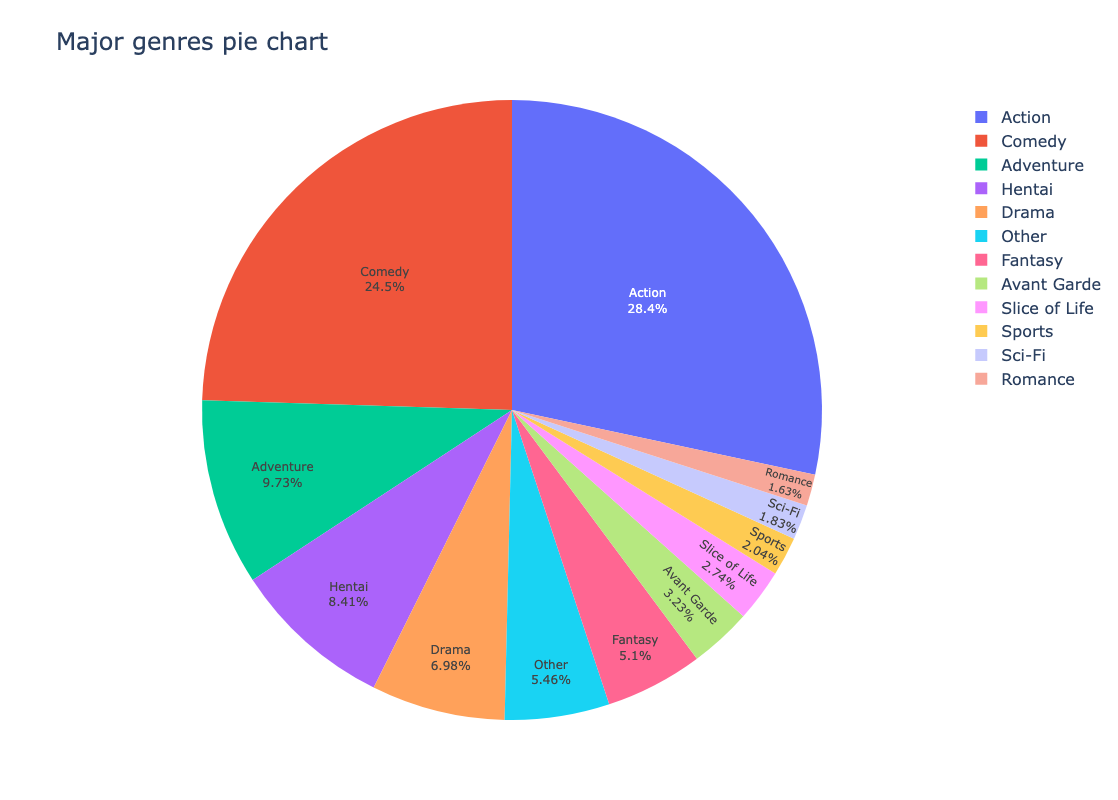

In [130]:
fig = px.pie(
    names=filtered_genre_counts.index,
    values=filtered_genre_counts.values,
    title=' Major genres pie chart',
    width=800,  
    height=800  
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label' 
)
fig.update_layout(
    title_font_size=24,
    legend_font_size=16  
)
fig.write_image("MJ.png") 
fig.show()

Let's look closer at the 'Other' group chart

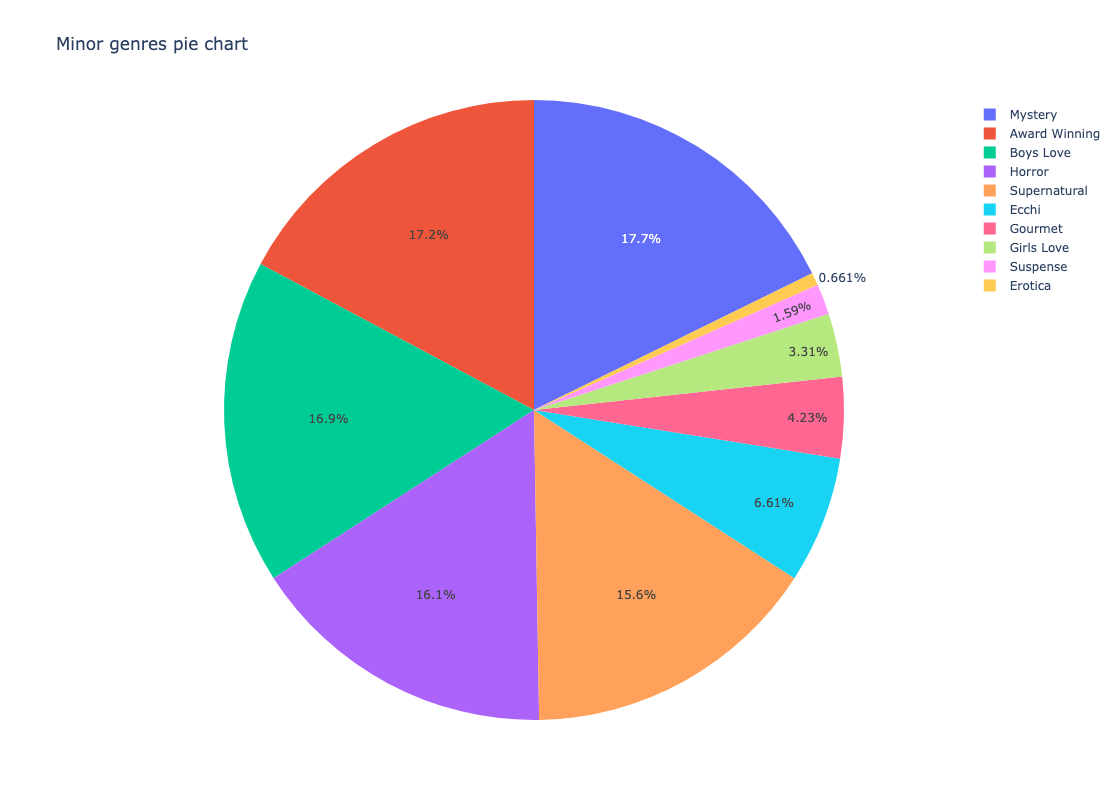

In [131]:
fig1=px.pie(names=othergenres.index,
            values=othergenres.values,
            title='Minor genres pie chart',
            width=800,  
            height=800 )
fig1.write_image("minor_genres.png") 
fig1.show()


In [132]:
avg_score=anime_df.groupby('Genres') ['Score'].mean()
df = avg_score.reset_index()
print(df)

           Genres     Score
0          Action  6.679460
1       Adventure  6.569881
2     Avant Garde  5.095424
3   Award Winning  7.153308
4       Boys Love  6.509141
5          Comedy  6.435754
6           Drama  6.739659
7           Ecchi  6.056600
8         Erotica  5.022000
9         Fantasy  6.141020
10     Girls Love  6.282000
11        Gourmet  6.620000
12         Hentai  6.119391
13         Horror  5.769016
14        Mystery  6.728507
15        Romance  6.357478
16         Sci-Fi  6.057866
17  Slice of Life  6.178711
18         Sports  6.927021
19   Supernatural  6.199322
20       Suspense  6.610000


Let's check which genre has the highest score.

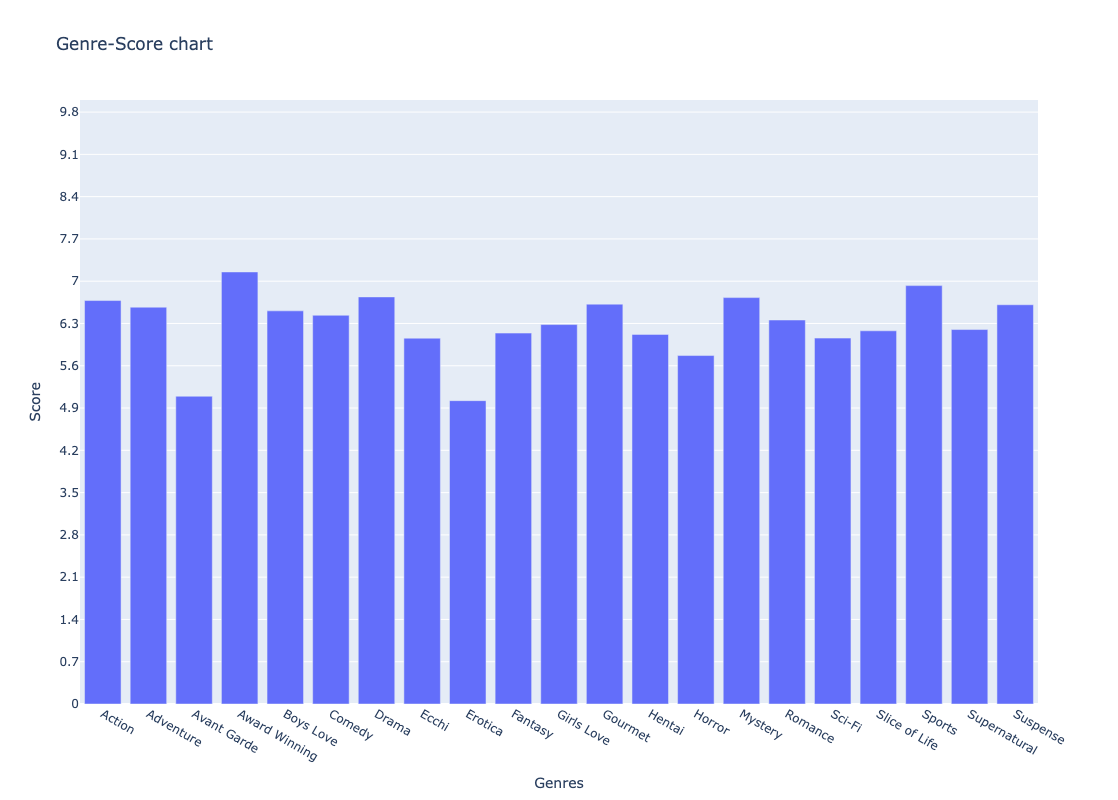

In [133]:
fig = px.bar(df, x="Genres", y="Score", title="Genre-Score chart",
            width=800,
            height=800)
fig.update_layout(yaxis=dict(range=[0, 10],
                            tick0=0,
                            dtick=0.7,
                            ))
fig.write_image("genre-score.png") 
fig.show()

In [134]:
anime_df['Premiered'] = anime_df['Premiered'].replace('UNKNOWN', np.nan)
anime_df = anime_df.dropna(subset=['Premiered'])
anime_df['Premiered'] = anime_df['Premiered'].str.extract(r"(\d{4})")


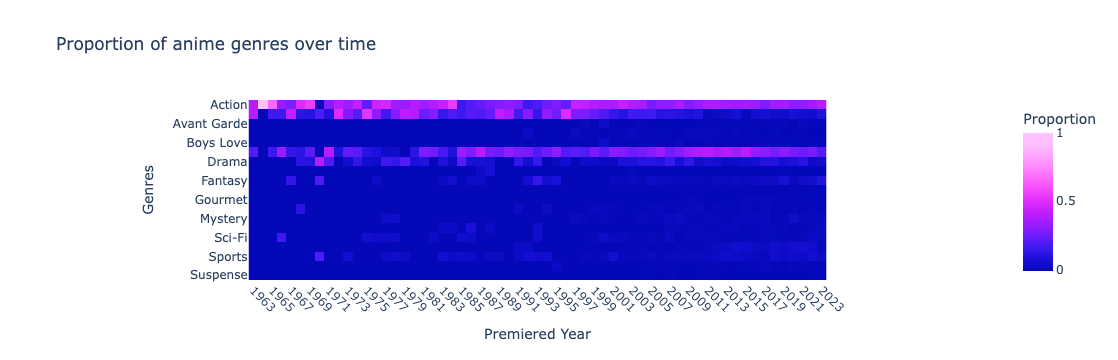

In [135]:
genre_counts = anime_df.groupby(['Premiered', 'Genres']).size().reset_index(name='Count')

total_shows_per_year = genre_counts.groupby('Premiered')['Count'].transform('sum')

genre_counts['Proportion'] = genre_counts['Count'] / total_shows_per_year

heatmap_data = genre_counts.pivot(index='Genres', columns='Premiered', values='Proportion').fillna(0)

fig = px.imshow(
    heatmap_data,
    x=heatmap_data.columns,  
    y=heatmap_data.index,    
    color_continuous_scale="plotly3",
    labels=dict(x="Premiered Year", y="Genres", color="Proportion"),
    title="Proportion of anime genres over time" 
)

fig.update_layout(
    xaxis=dict(tickangle=45),
)

fig.write_image("proportion.png") 
fig.show()

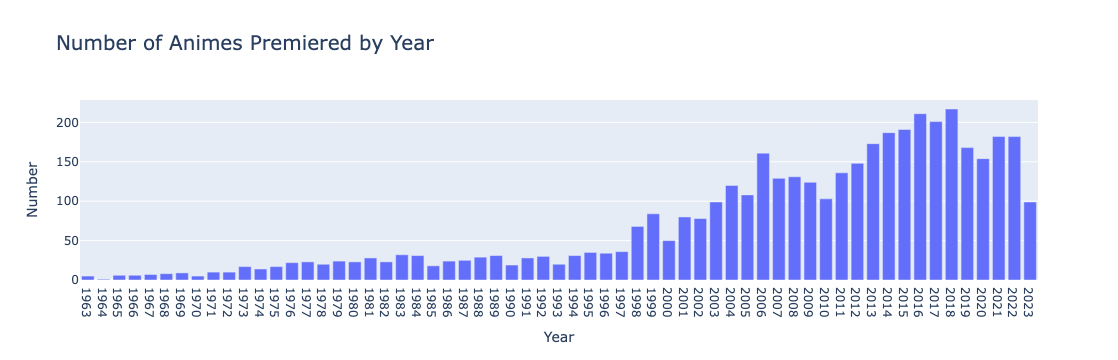

In [136]:
year_counts = anime_df['Premiered'].value_counts()
sorted_years = sorted(year_counts.index)

fig = go.Figure(data=go.Bar(
    x=sorted_years,
    y=year_counts[sorted_years], 
))

fig.update_layout(
    title='Number of Animes Premiered by Year',
    xaxis_title='Year',
    yaxis_title='Number',
    title_font=dict(size=20),
)
fig.write_image("number_animes.png") 
fig.show()

In [137]:
anime_df['Episodes'] = anime_df['Episodes'].replace('UNKNOWN', np.nan)
anime_df = anime_df.dropna(subset=['Episodes'])
anime_df['Episodes'] = anime_df['Episodes'].astype(float)
anime_df['Episodes'] = anime_df['Episodes'].astype(int)
episodes_groups=anime_df['Episodes'].value_counts()
episode_distribution = anime_df['Episodes'].value_counts()
print(episode_distribution)

Episodes
12     1405
13      639
26      402
24      227
25      176
       ... 
128       1
117       1
172       1
500       1
98        1
Name: count, Length: 175, dtype: int64


In [138]:
anime_df['Rank'] = anime_df['Rank'].replace('UNKNOWN', np.nan)
anime_df=anime_df.dropna(subset='Rank')

In [139]:
anime_df['Rank']=anime_df['Rank'].astype(float)
min_value = anime_df['Rank'].min()
max_value = anime_df['Rank'].max()
anime_df['Rank'] = (anime_df['Rank'] - min_value) / (max_value - min_value) * 10
anime_df['Rank'] = np.ceil(anime_df['Rank']).astype(int)

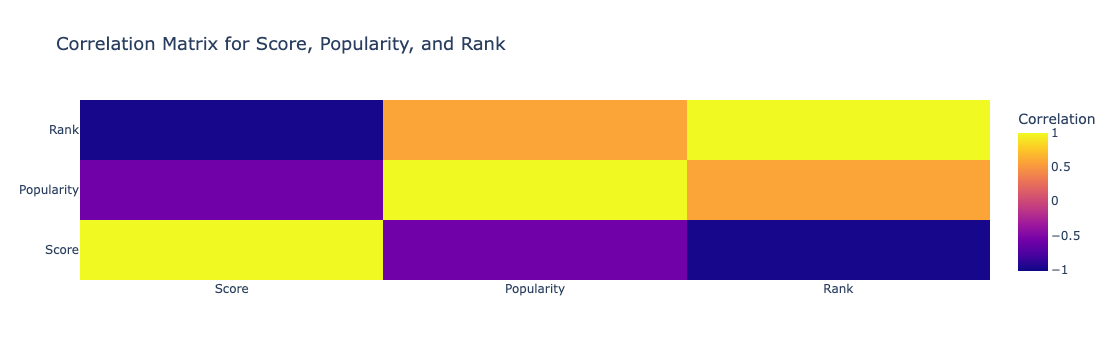

In [140]:

correlation_matrix = anime_df[['Score', 'Popularity', 'Rank']].corr()

fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='plasma',
    zmin=-1, zmax=1,
    colorbar=dict(title="Correlation")
))

fig.update_layout(
    title="Correlation Matrix for Score, Popularity, and Rank",
    title_font_size=18,
    font=dict(size=12),
    xaxis=dict(tickangle=0)
)
fig.write_image("correlation.png") 
fig.show()

Hypotesis:

Source of anime affects it's score and popularity , so major genres also rely on that sources that bring the highest popularity-score ratio.

Firstly let's look how sources affect the animes in general.

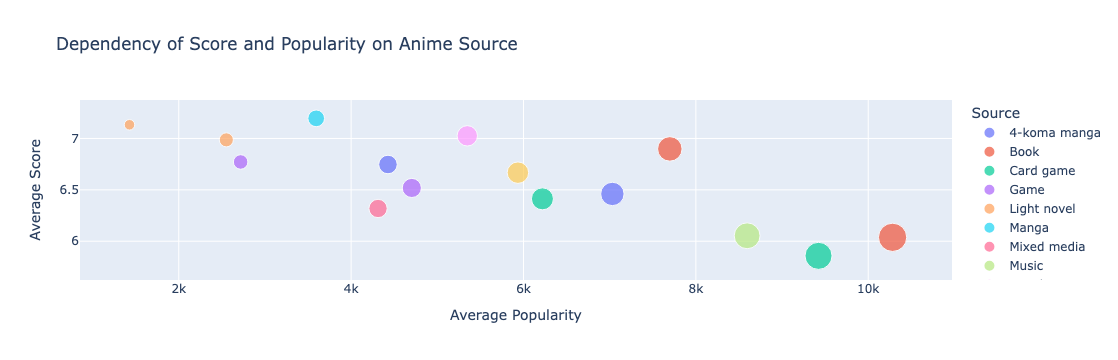

In [141]:
filtered_data = anime_df[anime_df["Source"] != "Unknown"]
grouped_data = filtered_data.groupby("Source").agg(
    avg_score=("Score", "mean"),
    avg_popularity=("Popularity", "mean")
).reset_index()


fig = px.scatter(
    grouped_data,
    x="avg_popularity",
    y="avg_score",
    size="avg_popularity",
    color="Source",
    hover_name="Source",
    labels={"avg_popularity": "Average Popularity", "avg_score": "Average Score"},
    title="Dependency of Score and Popularity on Anime Source"
)

fig.update_layout(
    xaxis_title="Average Popularity",
    yaxis_title="Average Score",
)
fig.write_image("scatter_1.png") 
fig.show()

Now I want to look at each genre to chek if source really affect genres.

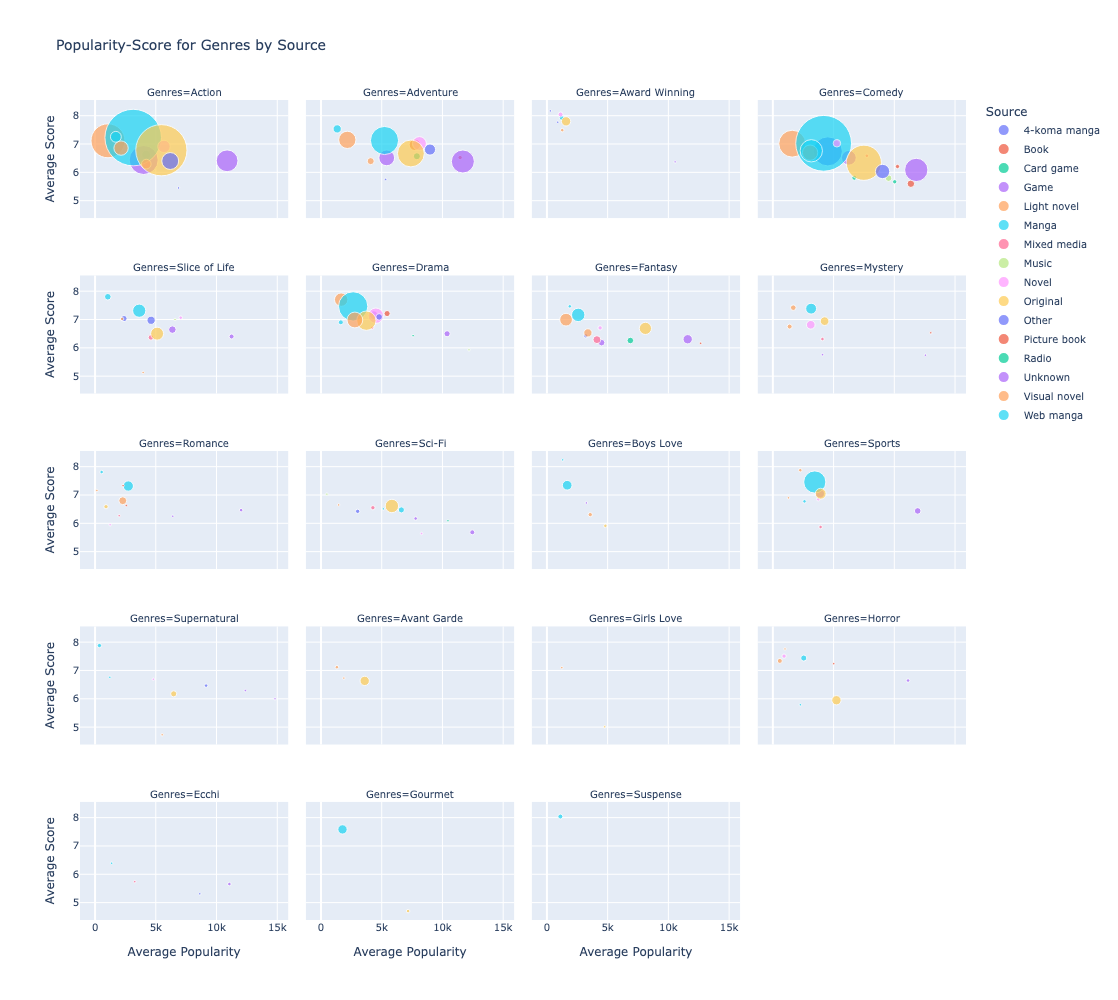

In [142]:
statistics = anime_df.groupby(["Source", "Genres"]).agg(
    avg_score=("Score", "mean"),
    avg_popularity=("Popularity", "mean"),
    anime_count=("Score", "count")
).reset_index()

fig = px.scatter(
    statistics,
    x="avg_popularity",
    y="avg_score",
    size="anime_count",
    color="Source",
    facet_col="Genres", 
    facet_col_wrap=4, 
    hover_data=["Source", "avg_popularity", "avg_score", "anime_count"],
    labels={
        "avg_popularity": "Average Popularity",
        "avg_score": "Average Score",
        "anime_count": "Number of Anime",
        "Genre": "Genre" 
    },
    title="Popularity-Score for Genres by Source",
    size_max=40  
)

fig.update_layout(
    width=1200, 
    height=1000,   
    font=dict(size=10),  

)

fig.show()
fig.write_image("scatter_2.png") 



As could be seen from "Major genres pie chart"  and "Popularity-Score for Genres by Source" major genres mostly have Manga as most used source and "Dependency of Score and Popularity on Anime Source" Manga leads by average score, so the hypotesis is true.